# Neural Networks

### Name: Atharv Subhekar 
### CWID: 20015840

## Importing Libraries

In [2]:
!pip install sklearn





zsh:1: command not found: pip


In [4]:
import pandas as pd
import numpy as np

#import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

## Data Preprocessing

In [ ]:
# loading dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv("iris.data", names = names)

# splitting dataset into features and target
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values

# label and one hot encoding target values
label_encoder =  LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.get_dummies(y).values

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Neural Network

In [ ]:
# building neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

# compiling neural network
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# number of epochs
epochs = 100

# fitting the model on training set
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = epochs)

Epoch 1/100
4/4 [==============================] - 2s 94ms/step - loss: 1.1357 - accuracy: 0.2231 - val_loss: 1.0542 - val_accuracy: 0.5714
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0080 - accuracy: 0.6694 - val_loss: 0.9632 - val_accuracy: 0.6429
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 0.9201 - accuracy: 0.6942 - val_loss: 0.8862 - val_accuracy: 0.6429
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8484 - accuracy: 0.6942 - val_loss: 0.8217 - val_accuracy: 0.6429
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7788 - accuracy: 0.6942 - val_loss: 0.7653 - val_accuracy: 0.6429
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.7225 - accuracy: 0.6942 - val_loss: 0.7184 - val_accuracy: 0.6429
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6651 - accuracy: 0.6942 - val_loss: 0.6603 - val_accuracy: 0.6429
Epoch 8/100
4/4 [===

## Performance Metrics

In [ ]:
# calculating test loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 52ms/step - loss: 0.0112 - accuracy: 1.0000


In [ ]:
# printing results
print("Training Accuracy: ", history.history["accuracy"][-1])
print("Validation Accuracy: ", history.history["val_accuracy"][-1])
print("Testing Accuracy: ", test_accuracy)

Training Accuracy:  0.9834710955619812
Validation Accuracy:  0.9285714030265808
Testing Accuracy:  1.0


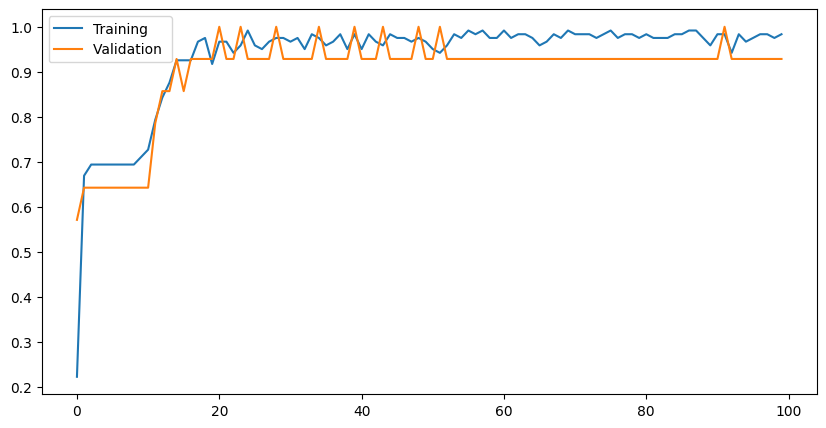

In [11]:
# plotting training and validation accuracy
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.figure(figsize = (10, 5))
plt.plot([i for i in range(epochs)], train_acc)
plt.plot([i for i in range(epochs)], val_acc)
plt.legend(["Training ", "Validation "])
plt.show()

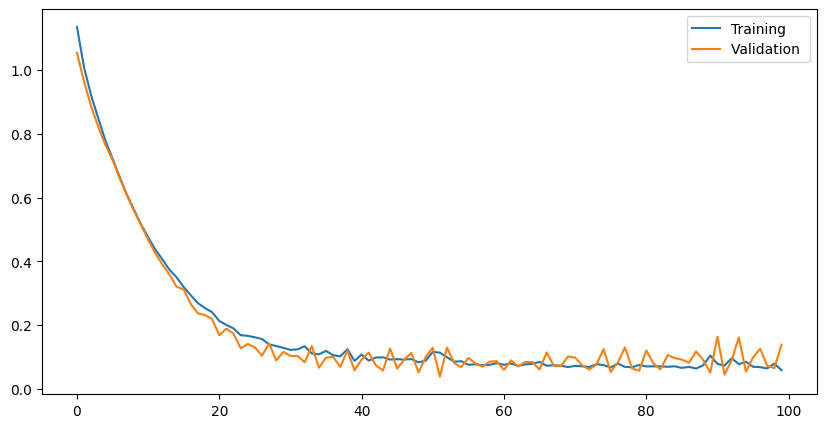

In [12]:
# plotting training and validation loss
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize = (10, 5))
plt.plot([i for i in range(epochs)], train_loss)
plt.plot([i for i in range(epochs)], val_loss)
plt.legend(["Training ", "Validation "])
plt.show()

## Prediction

In [ ]:
# testing model on the test set
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 147ms/step


In [10]:
# comparing true and predicted values
true = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

print("Ground Truth: ", true)
print("Predicted: ", predicted)

Ground Truth:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
Predicted:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
